In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


### Know your data: 

In [3]:
df.head(5)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
df.shape

(892, 6)

In [5]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
# Price has different type "object" it should be of "int" value.
# Year has different type "object" it should be of  "Date-Time"

In [8]:
# statistical summary of data:

df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [9]:
df["kms_driven"]=df["kms_driven"].str.replace('kms','')
df["kms_driven"]

0      45,000 
1          40 
2      22,000 
3      28,000 
4      36,000 
        ...   
887        NaN
888    27,000 
889    40,000 
890     Petrol
891     Petrol
Name: kms_driven, Length: 892, dtype: object

In [10]:
df["kms_driven"]=df["kms_driven"].replace('kms','')

In [11]:
df["kms_driven"]=df["kms_driven"].str.replace(',','')

In [12]:
df['Price']=df["Price"].str.replace(',','')

In [13]:
df=df.rename(columns={'kms_driven':'kms_driven(kms)'})
df.head()

,name,company,year,Price,kms_driven(kms),fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel


In [14]:
df.isnull().sum()

name                0
company             0
year                0
Price               0
kms_driven(kms)    52
fuel_type          55
dtype: int64

In [15]:
df["company"].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [16]:
df["fuel_type"].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [17]:
df["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [18]:
df["Price"].unique()

array(['80000', '425000', 'Ask For Price', '325000', '575000', '175000',
       '190000', '830000', '250000', '182000', '315000', '415000',
       '320000', '1000000', '500000', '350000', '160000', '310000',
       '75000', '100000', '290000', '95000', '180000', '385000', '105000',
       '650000', '689999', '448000', '549000', '501000', '489999',
       '280000', '349999', '284999', '345000', '499999', '235000',
       '249999', '1475000', '395000', '220000', '170000', '85000',
       '200000', '570000', '110000', '448999', '1891111', '159500',
       '344999', '449999', '865000', '699000', '375000', '224999',
       '1200000', '195000', '351000', '240000', '90000', '155000',
       '600000', '189500', '210000', '390000', '135000', '1600000',
       '701000', '265000', '525000', '372000', '635000', '550000',
       '485000', '329500', '251111', '569999', '69999', '299999',
       '399999', '450000', '270000', '158400', '179000', '125000',
       '299000', '150000', '275000', '285000',

In [19]:
df["kms_driven(kms)"].unique()

array(['45000 ', '40 ', '22000 ', '28000 ', '36000 ', '59000 ', '41000 ',
       '25000 ', '24530 ', '60000 ', '30000 ', '32000 ', '48660 ',
       '4000 ', '16934 ', '43000 ', '35550 ', '39522 ', '39000 ',
       '55000 ', '72000 ', '15975 ', '70000 ', '23452 ', '35522 ',
       '48508 ', '15487 ', '82000 ', '20000 ', '68000 ', '38000 ',
       '27000 ', '33000 ', '46000 ', '16000 ', '47000 ', '35000 ',
       '30874 ', '15000 ', '29685 ', '130000 ', '19000 ', nan, '54000 ',
       '13000 ', '38200 ', '50000 ', '13500 ', '3600 ', '45863 ',
       '60500 ', '12500 ', '18000 ', '13349 ', '29000 ', '44000 ',
       '42000 ', '14000 ', '49000 ', '36200 ', '51000 ', '104000 ',
       '33333 ', '33600 ', '5600 ', '7500 ', '26000 ', '24330 ', '65480 ',
       '28028 ', '200000 ', '99000 ', '2800 ', '21000 ', '11000 ',
       '66000 ', '3000 ', '7000 ', '38500 ', '37200 ', '43200 ', '24800 ',
       '45872 ', '40000 ', '11400 ', '97200 ', '52000 ', '31000 ',
       '175430 ', '37000 ', '65000

### Data Wrangling/Cleaning 

In [20]:
## 1st i would like to keep original dataset as: *** original_df***
original_df=df.copy()

In [21]:
df.isnull().sum()

name                0
company             0
year                0
Price               0
kms_driven(kms)    52
fuel_type          55
dtype: int64

In [22]:
## Dealing with "Year" Column
## Remove Non-Numeric Values and Invalid Entries:

In [23]:
df = df[df['year'].str.isnumeric()]  #Filter the DataFrame to keep only rows where the 'year' column contains numeric values.

In [24]:
df['year'].astype(int)

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [25]:
df["year"]=df['year'].astype(int)

In [26]:
df['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [27]:
## Dealing with "Price" Column
# Remove the entries having "Ask For Price"

In [28]:
df=df[df['Price']!="Ask For Price"]

In [29]:
df['Price']

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: object

In [30]:
df['Price'].astype(int)

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 819, dtype: int32

In [31]:
df['Price']=df['Price'].astype(int)

In [32]:
## Dealing with Column "kms_driven(kms)"
# Keep only numeric entries

In [33]:
df['kms_driven(kms)'].str.isnumeric()

0      False
1      False
3      False
4      False
6      False
       ...  
886    False
888    False
889    False
890    False
891    False
Name: kms_driven(kms), Length: 819, dtype: bool

In [34]:
df = df[pd.to_numeric(df['kms_driven(kms)'], errors='coerce').notna()]
df['kms_driven(kms)'] = pd.to_numeric(df['kms_driven(kms)'])


In [35]:
df['kms_driven(kms)'] = pd.to_numeric(df['kms_driven(kms)'], errors='coerce')
df['kms_driven(kms)'].fillna(0, inplace=True)  

In [36]:
df['kms_driven(kms)'].astype(int)

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven(kms), Length: 817, dtype: int32

In [37]:
df.head()

,name,company,year,Price,kms_driven(kms),fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [38]:
df.shape

(817, 6)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             817 non-null    object
 1   company          817 non-null    object
 2   year             817 non-null    int32 
 3   Price            817 non-null    int32 
 4   kms_driven(kms)  817 non-null    int64 
 5   fuel_type        816 non-null    object
dtypes: int32(2), int64(1), object(3)
memory usage: 38.3+ KB


In [40]:
df['fuel_type'].isna().sum()       ## There is one missing value in "fuel_type" column

1

In [41]:
mode_value=df['fuel_type'].mode()
mode_value                                  

0    Petrol
dtype: object

In [42]:
## Let's impute that missing entry with the mode value of that column.
df["fuel_type"].replace(np.nan,mode_value[0],inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             817 non-null    object
 1   company          817 non-null    object
 2   year             817 non-null    int32 
 3   Price            817 non-null    int32 
 4   kms_driven(kms)  817 non-null    int64 
 5   fuel_type        817 non-null    object
dtypes: int32(2), int64(1), object(3)
memory usage: 38.3+ KB


In [44]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [45]:
## Now, I don't have any missing value presen in my datset.

### Exploratory Data Analysis

In [46]:
df.head(2)

,name,company,year,Price,kms_driven(kms),fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel


In [47]:
## Univariate Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             817 non-null    object
 1   company          817 non-null    object
 2   year             817 non-null    int32 
 3   Price            817 non-null    int32 
 4   kms_driven(kms)  817 non-null    int64 
 5   fuel_type        817 non-null    object
dtypes: int32(2), int64(1), object(3)
memory usage: 38.3+ KB


In [48]:
df.describe()

,year,Price,kms_driven(kms)
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


In [49]:
#Price Column

df["Price"].mean()

411550.2741738066

In [50]:
df["Price"].max()

8500003

In [51]:
df["Price"].min()

30000

In [52]:
med_price=df["Price"].median()    ## There is outliers
med_price

299999.0

In [53]:
# kms_driven(kms) Column
df["kms_driven(kms)"].mean()

46250.71481028152

In [54]:
med_val=df["kms_driven(kms)"].median()
med_val

41000.0

In [55]:
max_value=df["kms_driven(kms)"].max()
max_value

400000

In [56]:
min_value=df["kms_driven(kms)"].min()
min_value

0

In [57]:
min_value=df["kms_driven(kms)"].std()
min_value

34283.745253881294

Text(0.5, 1.0, 'Boxplot for Numerical Column')

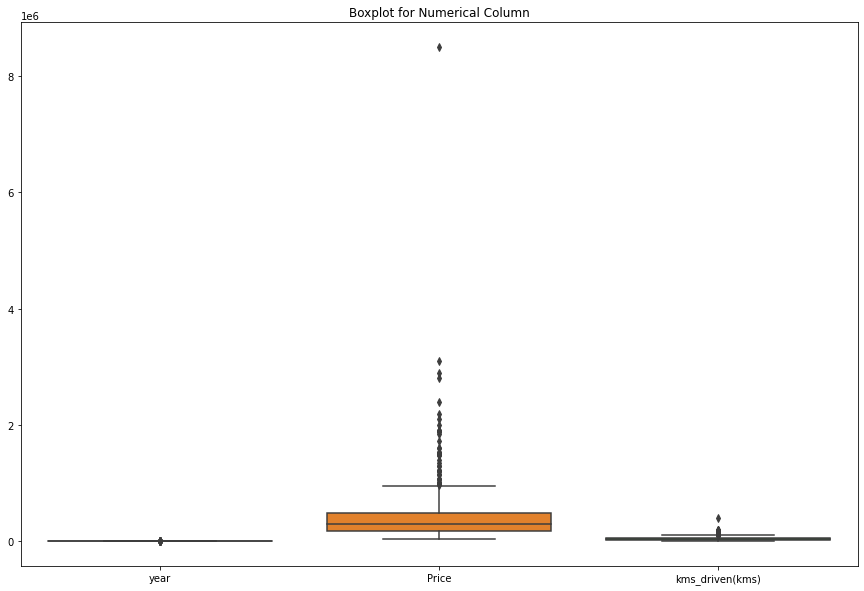

In [58]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.title('Boxplot for Numerical Column')

In [59]:
# Outliers Treatment of Price column

df=df[df["Price"]<2e6]

In [60]:
# We should go for IQR .
Q1_price = df["Price"].quantile(0.25)
Q3_price = df["Price"].quantile(0.75)
iqr_price= Q3_price-Q1_price
print(iqr_price)

314999.0


In [61]:
lower_bound = Q1_price - 1.5 * iqr_price
print(lower_bound)
upper_bound = Q3_price + 1.5 * iqr_price
print(upper_bound)

outliers = df[(df["Price"] < lower_bound) | (df["Price"] > upper_bound)]

# Now Each values below the lower_bound will be replaced by "lower_bound"and all the values above the upper_bound will be replaced by "upper_bound".

df.loc[df["Price"] < lower_bound, "Price"] = med_price

df.loc[df["Price"] > upper_bound, "Price"] = upper_bound

-297498.5
962497.5


<AxesSubplot:>

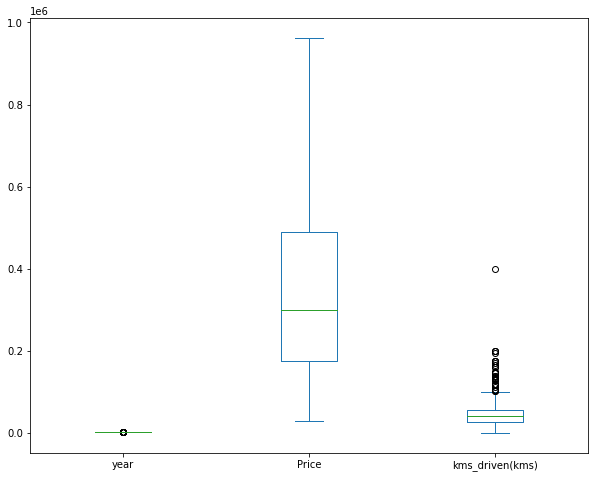

In [62]:
df.plot(kind="box",figsize=(10,8))

In [63]:
# Outlier treatment of kms_driven(kms)"

In [64]:
# We should go for IQR .
Q1_kms = df["kms_driven(kms)"].quantile(0.25)
print(Q1_kms)
Q3_kms = df["kms_driven(kms)"].quantile(0.75)
print(Q3_kms)
iqr_kms= Q3_kms-Q1_kms
print(iqr_kms)

27000.0
57000.0
30000.0


In [65]:
lower_bound = Q1_kms - 1.5 * iqr_kms
print(lower_bound)
upper_bound = Q3_kms + 1.5 * iqr_kms
print(upper_bound)

outliers = df[(df["kms_driven(kms)"] < lower_bound) | (df["kms_driven(kms)"] > upper_bound)]

# Now Each values below the lower_bound will be replaced by "lower_bound"and all the values above the upper_bound will be replaced by "upper_bound".

df.loc[df["kms_driven(kms)"] < lower_bound, "kms_driven(kms)"] = med_price

df.loc[df["kms_driven(kms)"] > upper_bound, "kms_driven(kms)"] = upper_bound

-18000.0
102000.0


<AxesSubplot:>

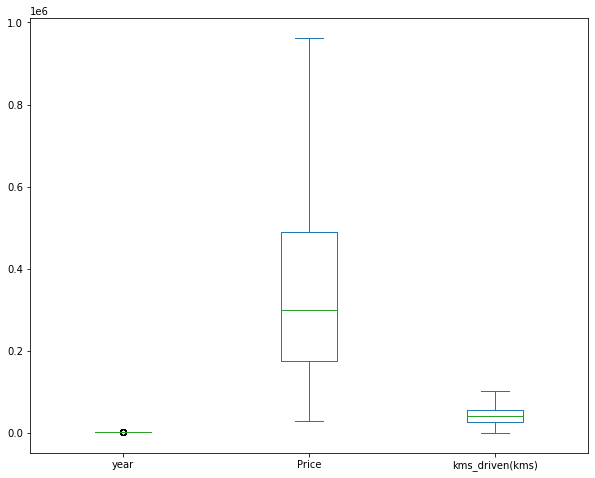

In [66]:
df.plot(kind="box",figsize=(10,8))

In [67]:
df.shape

(809, 6)

In [68]:
## Now my dataset is free from outliers.

In [69]:
df.head()

,name,company,year,Price,kms_driven(kms),fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
6,Ford Figo,Ford,2012,175000.0,41000,Diesel


<AxesSubplot:>

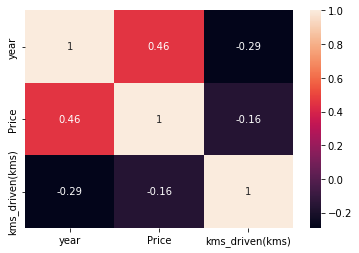

In [70]:
sns.heatmap(df.corr(), annot=True)

### Model Creation 

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

### Identify Predictors and Target Variables

In [72]:
x=df.drop(columns='Price')
y=df['Price']                   # Price is my Target Variable

In [73]:
x.head()       # input variables/Predictors 

,name,company,year,kms_driven(kms),fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,36000,Diesel
6,Ford Figo,Ford,2012,41000,Diesel


In [74]:
y.head()     # Target variable

0     80000.0
1    425000.0
3    325000.0
4    575000.0
6    175000.0
Name: Price, dtype: float64

### Split the data into train and test

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(566, 5) (566,)
(243, 5) (243,)


In [76]:
#### I have 3 colum "name","company" and "company" are categorical variable. 1st we need to encode these variables.
## I'm using one-hot-encoder method.
# OneHotEncoder from the sklearn.preprocessing module to perform one-hot encoding on categorical variables in your DataFrame.

from sklearn.preprocessing import OneHotEncoder  

ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']]) #The fit method of the OneHotEncoder is used to fit the encoder on the specified categorical columns in df

OneHotEncoder()

In [77]:
ohe.categories_

[array(['Audi A4 1.8 TFSI Multitronic Premium Plus',
        'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
        'Audi A8', 'Audi Q3 2.0 TDI quattro Premium', 'Audi Q7',
        'BMW 3 Series 320d Sedan', 'BMW 3 Series 320i',
        'BMW 5 Series 520d Sedan', 'BMW 5 Series 530i',
        'BMW 7 Series 740Li Sedan', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d xLine', 'Chevrolet Beat',
        'Chevrolet Beat Diesel', 'Chevrolet Beat LS Diesel',
        'Chevrolet Beat LS Petrol', 'Chevrolet Beat LT Diesel',
        'Chevrolet Beat LT Opt Diesel', 'Chevrolet Beat LT Petrol',
        'Chevrolet Beat PS Diesel', 'Chevrolet Cruze LTZ',
        'Chevrolet Cruze LTZ AT', 'Chevrolet Enjoy',
        'Chevrolet Enjoy 1.4 LS 8 STR', 'Chevrolet Sail 1.2 LS',
        'Chevrolet Sail UVA Petrol LT ABS', 'Chevrolet Spark',
        'Chevrolet Spark 1.0 LT', 'Chevrolet Spark LS 1.0',
        'Chevrolet Spark LT 1.0', 'Chevrolet Spark LT 1.0 Airbag',
        'Chevrolet Tave

In [78]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                     remainder='passthrough')

In [79]:
#Linear regression algorithm

lr=LinearRegression()

In [80]:
pipe=make_pipeline(column_trans,lr)

In [81]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium', 'Audi Q7',
       'BMW 3 Series 320d Sedan', 'BMW 3 Series 320i',
       'BMW 5 Series 520d Sedan', 'BMW 5 Series...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jeep', 'Mahindra', 'Maruti',
       'Mercedes', 'Mini', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=o

In [82]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium', 'Audi Q7',
       'BMW 3 Series 320d Sedan', 'BMW 3 Series 320i',
       'BMW 5 Series 520d Sedan', 'BMW 5 Series...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jeep', 'Mahindra', 'Maruti',
       'Mercedes', 'Mini', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=o

In [83]:
y_pred=pipe.predict(x_test)
y_pred

array([ 279743.93033916,  356840.7422789 ,  243313.07796067,
        115054.55135857,  568201.83046651,  460936.05587861,
        472899.71751466,  825846.22262242,  242814.07827378,
          5057.24974645,  535041.29316865,  409757.20305719,
        280763.56676725,  186925.76000128,  941715.48669644,
        288906.41529527,  202723.46142104,  319431.78156509,
        276154.64714364,  963319.90149075,  500712.92668323,
        201763.47252811,  194643.72987023,  426951.5924629 ,
        211220.91271449,  321663.96822101,  239762.57158365,
        457944.3824828 ,  151672.3190234 ,  255478.07604425,
         69274.12248833,  348300.06432664,  553693.44699444,
        205786.53623008,  307422.30426863,  313160.89798285,
        215394.26313921,  475583.05282842,  143416.37167514,
        373147.08457686,  413653.54477407,  138808.68429181,
        269085.21085139,  360397.76736772,  423953.96933693,
        155546.48709542,  120747.79357815,  476650.63739555,
        517134.22856971,

In [84]:
y_test

410    169999.0
371    340000.0
666    140000.0
548    115000.0
472    900000.0
         ...   
519    375000.0
258    245000.0
250    699000.0
839     39999.0
186    340000.0
Name: Price, Length: 243, dtype: float64

In [85]:
r2_score(y_test,y_pred)

0.7033814405620873

The coefficient of determination,(R-squared), is a statistical measure gives 0.62

We can see that the R-squared score of the final dataframe was much closer to the R-squared cross validation.which is equal to 0.62.



In [90]:
file_path = r'D:\InternPe_Internship\quikr_car_cleaned_df.csv'

df.to_csv(file_path, index=False)